# RANK Tutorial

Let us dive a bit deeper into the functionalities of the package by looking at a nonlinear medium scale DSGE model in the style of Smets & Wouters (2003,2007). The model features Rothemberg instead of Calvo pricing, the zero-lower bound on the nominal interest rate, and downwards nominal wage rigidity. The full model specification can be found in the appendix of the [original paper](https://gregorboehl.com/live/hank_speed_boehl.pdf), whereas the [yaml file can be found here](https://github.com/gboehl/econpizza/blob/master/econpizza/examples/dsge.yml).

Start with some misc imports and load the package. The rest of these tutorials rely on the ``grgrlib`` for plotting, which can be installed via the official repositories ("``pip install grgrlib``").

In [1]:
import jax.numpy as jnp # use jax.numpy instead of normal numpy
from grgrlib import grplot # nice backend for batch plotting with matplotlib
import econpizza as ep # pizza
import matplotlib.pyplot as plt

# only necessary if you run this in a jupyter notebook:
%matplotlib inline 

The YAML file called `dsge.yml` is, together with a few other examples, provided with the package and can be found [in this folder](https://github.com/gboehl/econpizza/tree/master/econpizza/examples).

These examples can be imported from the ``econpizza.examples`` submodule.

In [2]:
# the path to the example YAML 
example_dsge = ep.examples.dsge

This is nothing else than the local path to the YAML file:

In [3]:
print(example_dsge)

/home/gboehl/repos/econpizza/econpizza/examples/dsge.yml


Let us make use of the functionality to parse the model before loading it, so that we can make some manual adjustments. This is especially useful if we want to loop over different parameter values.

In [4]:
model_dict = ep.parse(example_dsge)
model_dict.keys()

dict_keys(['name', 'description', 'variables', 'parameters', 'shocks', 'equations', 'steady_state', 'path', 'var_names'])

``model_dict`` now contains all information on the model. Let's, for example, change the sensitivity of the monetary policy rule w.r.t. inflation, and then load the model. Note that I'm loading ``model_dict`` instead of the path to the YAML. `ep.load` would accept both as input, but of course only ``model_dict`` contains the changed parameter value.

In [5]:
model_dict['steady_state']['fixed_values']['phi_pi'] = 2.
# load the model
mod = ep.load(model_dict)
type(mod)

(load:) Parsing done.


econpizza.__init__.PizzaModel

``mod`` is now an instance of the class ``PizzaModel``, which is the generic model class. Note that this still contains the original dictionary together with some compiled information:

In [6]:
mod.keys()

dict_keys(['name', 'description', 'variables', 'parameters', 'shocks', 'equations', 'steady_state', 'path', 'var_names', 'context', 'cache', 'globals', 'func_strings', 'par_names'])

Lets find the steady state.

In [7]:
_ = mod.solve_stst()

    Iteration   1 | max. error 1.90e+00 | lapsed 0.7192
    Iteration   2 | max. error 2.31e+00 | lapsed 0.7732
    Iteration   3 | max. error 9.71e-01 | lapsed 0.7737
    Iteration   4 | max. error 1.13e-01 | lapsed 0.7740
    Iteration   5 | max. error 4.88e-02 | lapsed 0.7743
    Iteration   6 | max. error 1.79e-02 | lapsed 0.7745
    Iteration   7 | max. error 4.54e-03 | lapsed 0.7750
    Iteration   8 | max. error 4.67e-04 | lapsed 0.7753
    Iteration   9 | max. error 6.07e-06 | lapsed 0.7755
(solve_stst:) Steady state found (0.90229s). The solution converged.


Note that the result gets cached and will not be re-evaluated if called again (this can be bypassed by using the `force=True` flag in `solve_stst()`).

In [8]:
_ = mod.solve_stst()

    Iteration   1 | max. error 1.90e+00 | lapsed 0.0003
    Iteration   2 | max. error 2.31e+00 | lapsed 0.0012
    Iteration   3 | max. error 9.71e-01 | lapsed 0.0015
    Iteration   4 | max. error 1.13e-01 | lapsed 0.0018
    Iteration   5 | max. error 4.88e-02 | lapsed 0.0020
    Iteration   6 | max. error 1.79e-02 | lapsed 0.0023
    Iteration   7 | max. error 4.54e-03 | lapsed 0.0025
    Iteration   8 | max. error 4.67e-04 | lapsed 0.0028
    Iteration   9 | max. error 6.07e-06 | lapsed 0.0030
(solve_stst:) Steady state found (0.023177s). The solution converged.


...but you could change a parameter or steady state value and reevaluate again:

In [9]:
model_dict['steady_state']['fixed_values']['sigma_c'] = 1.5
# load the model
mod = ep.load(model_dict)
newton_dict = mod.solve_stst()

(load:) Parsing done.
    Iteration   1 | max. error 1.90e+00 | lapsed 0.6892
    Iteration   2 | max. error 2.31e+00 | lapsed 0.6901
    Iteration   3 | max. error 9.71e-01 | lapsed 0.6904
    Iteration   4 | max. error 1.13e-01 | lapsed 0.6907
    Iteration   5 | max. error 4.88e-02 | lapsed 0.6909
    Iteration   6 | max. error 1.79e-02 | lapsed 0.6912
    Iteration   7 | max. error 4.54e-03 | lapsed 0.6914
    Iteration   8 | max. error 4.67e-04 | lapsed 0.6917
    Iteration   9 | max. error 6.07e-06 | lapsed 0.6919
(solve_stst:) Steady state found (0.71011s). The solution converged.


Also note that this was much faster thant the first run above, because the function ``solve_stst()`` is now cached. This makes it much faster to try out different steady state values. 

The object ``newton_dict`` contains the results from the Newton-based root finding, which may be interesting for debugging (you must use the ``raise_errors=False`` flag to avoid raising an error and to get the dictionary):

In [10]:
model_dict_broken = ep.copy(model_dict) # ep.copy is an alias for deepcopy
model_dict_broken['steady_state']['fixed_values']['mc'] = 200. # so wrong!
# load the model
mod = ep.load(model_dict_broken)
newton_dict = mod.solve_stst(raise_errors=False)

(load:) Parsing done.
    Iteration   1 | max. error 1.20e+03 | lapsed 0.7020
    Iteration   2 | max. error 1.20e+03 | lapsed 0.7036
    Iteration   3 | max. error 1.20e+03 | lapsed 0.7047
    Iteration   4 | max. error 1.20e+03 | lapsed 0.7055
    Iteration   5 | max. error 1.20e+03 | lapsed 0.7061
    Iteration   6 | max. error 1.26e+03 | lapsed 0.7065
    Iteration   7 | max. error 1.89e+04 | lapsed 0.7068
    Iteration   8 | max. error 2.38e+04 | lapsed 0.7071
    Iteration   9 | max. error 1.20e+03 | lapsed 0.7074
    Iteration  10 | max. error 1.20e+03 | lapsed 0.7076
    Iteration  11 | max. error 1.20e+03 | lapsed 0.7079
    Iteration  12 | max. error 1.20e+03 | lapsed 0.7081
    Iteration  13 | max. error 1.20e+03 | lapsed 0.7084
    Iteration  14 | max. error 1.20e+03 | lapsed 0.7086
(solve_stst:) Steady state FAILED (max. error is 1.20e+03 in eqn. 13). Maximum number of 15 iterations reached. 


This failed because marginal costs are a function of the values of ``theta``. While in this case the reason is clear, in other cases you could have a look at the Newton dictionary to debug this:

In [11]:
print(newton_dict.keys())

dict_keys(['success', 'message', 'x', 'niter', 'fun', 'jac', 'det', 'initial_values'])


Let us better return to the working model. The model has many shocks. We'll go for a risk premium shock, ``e_u``.

In [12]:
mod = ep.load(model_dict)
_ = mod.solve_stst()
print(mod['shocks'])

# shock the risk premium
shk = ('e_u', .01)

(load:) Parsing done.
    Iteration   1 | max. error 1.90e+00 | lapsed 0.6500
    Iteration   2 | max. error 2.31e+00 | lapsed 0.6508
    Iteration   3 | max. error 9.71e-01 | lapsed 0.6511
    Iteration   4 | max. error 1.13e-01 | lapsed 0.6514
    Iteration   5 | max. error 4.88e-02 | lapsed 0.6517
    Iteration   6 | max. error 1.79e-02 | lapsed 0.6519
    Iteration   7 | max. error 4.54e-03 | lapsed 0.6522
    Iteration   8 | max. error 4.67e-04 | lapsed 0.6525
    Iteration   9 | max. error 6.07e-06 | lapsed 0.6528
(solve_stst:) Steady state found (0.67081s). The solution converged.
['e_beta', 'e_z', 'e_g', 'e_p', 'e_w', 'e_i', 'e_r', 'e_u']


Simulation works as before...

In [13]:
# find the nonlinear trajectory
x, flag = mod.find_path(shock=shk)

    Iteration   1 | max error 2.24e+00 | lapsed 1.4283s
    Iteration   2 | max error 7.13e-02 | lapsed 1.4407s
    Iteration   3 | max error 3.33e-02 | lapsed 1.4510s
    Iteration   4 | max error 3.10e-02 | lapsed 1.4609s
    Iteration   5 | max error 2.39e-02 | lapsed 1.4733s
    Iteration   6 | max error 1.37e-02 | lapsed 1.4831s
    Iteration   7 | max error 2.72e-03 | lapsed 1.4928s
    Iteration   8 | max error 1.61e-05 | lapsed 1.5025s
    Iteration   9 | max error 6.38e-11 | lapsed 1.5125s
(find_path:) Stacking done (1.640s). The solution converged.


Now ``x`` contains the trajectory in response to the shock. Let us plot this. Note that the dynamics are somewhat "twisted" because of the downwards nominal wage rigidigy.

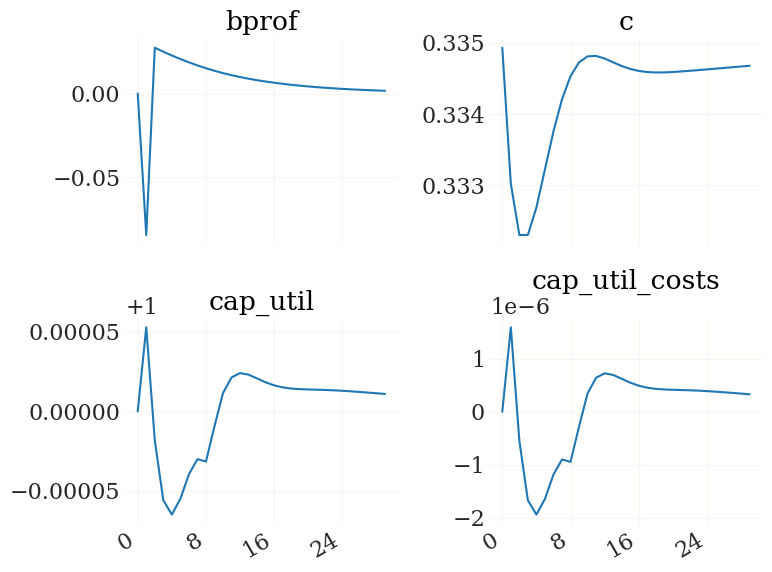

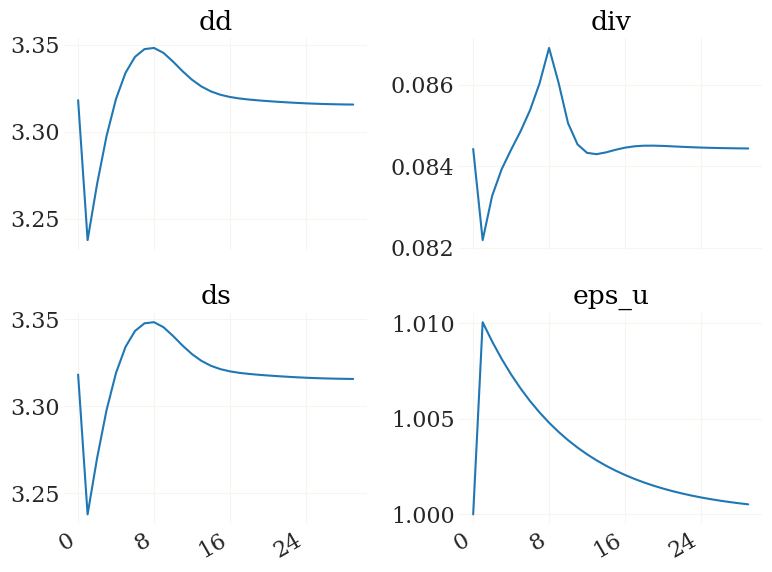

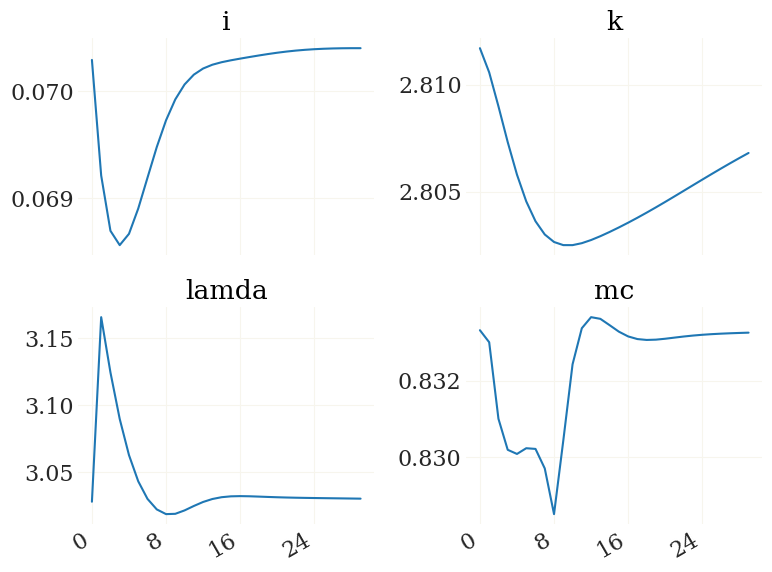

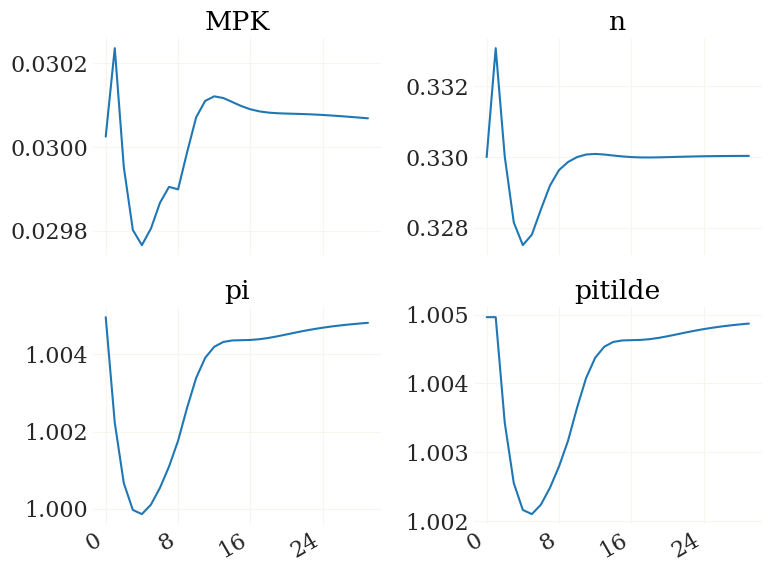

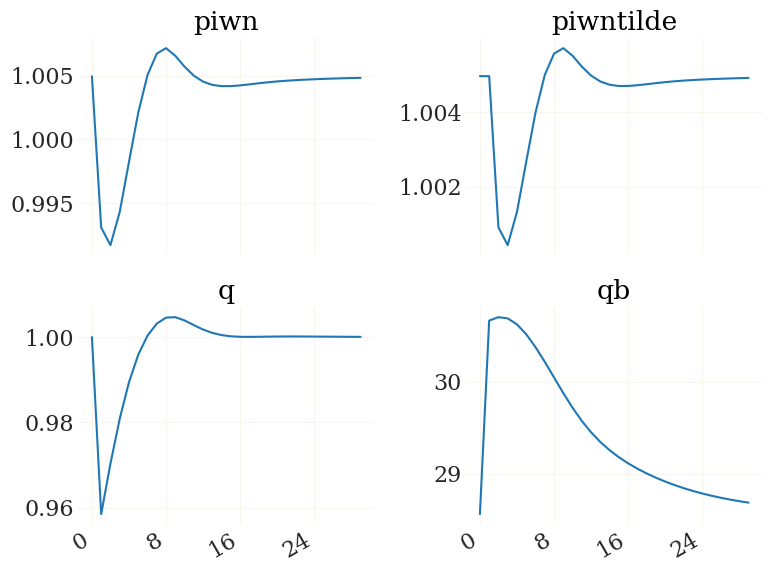

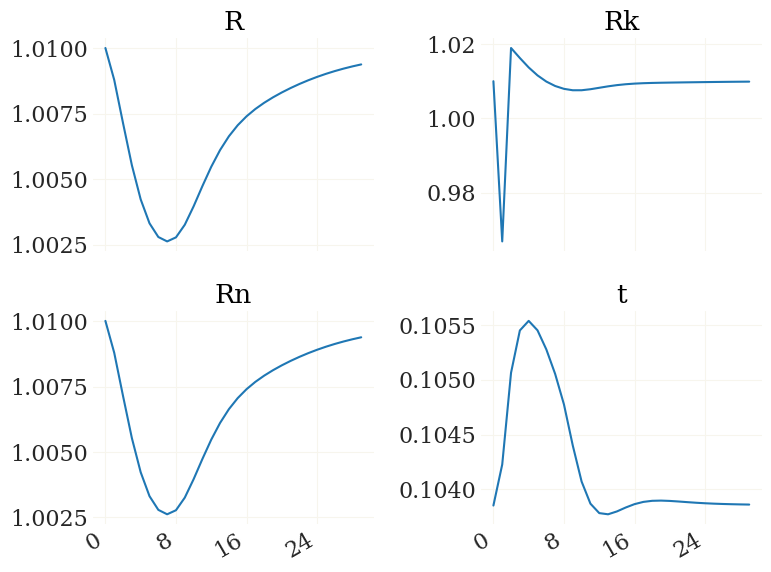

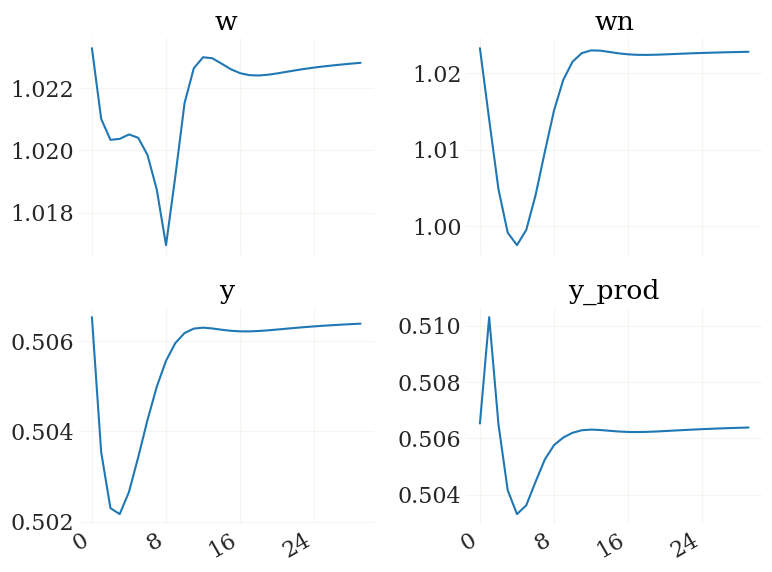

In [14]:
_ = grplot(x[:30], labels=mod.var_names)